<a href="https://colab.research.google.com/github/rique29/Atv-Machine/blob/main/Atv_Machine01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iniciando Experimentos Estatísticos (30 Rodadas por Configuração)...
-> Pequena/Baixa (Pop=20, Mut=1%, Cross=60%): Média Fitness = 232.0000, Desvio Padrão = 47.9166
-> Média/Moderada (Pop=50, Mut=5%, Cross=80%): Média Fitness = 260.0000, Desvio Padrão = 0.0000
-> Grande/Alta (Pop=100, Mut=10%, Cross=90%): Média Fitness = 260.0000, Desvio Padrão = 0.0000

RESULTADOS ESTATÍSTICOS (PARA ANÁLISE NA SEÇÃO 4 DA DOCUMENTAÇÃO)
| Configuração                               |   Tamanho da População | Taxa de Mutação   | Taxa de Crossover   |   Gerações |   Fitness Médio Final |   Desvio Padrão (σ) |
|:-------------------------------------------|-----------------------:|:------------------|:--------------------|-----------:|----------------------:|--------------------:|
| Pequena/Baixa (Pop=20, Mut=1%, Cross=60%)  |                     20 | 1%                | 60%                 |        100 |                   232 |             47.9166 |
| Média/Moderada (Pop=50, Mut=5%, Cross=80%) |            

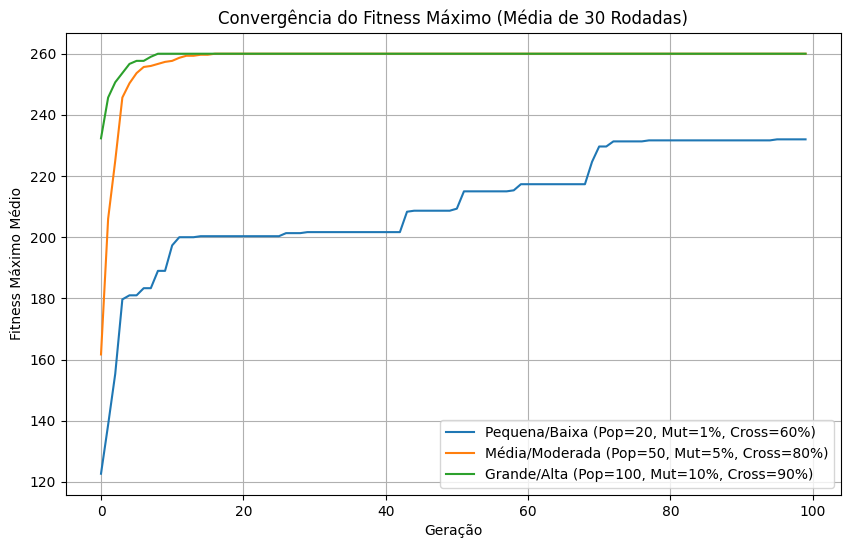


INFORMAÇÕES DA MELHOR SOLUÇÃO ENCONTRADA NA ÚLTIMA RODADA DE CADA EXPERIMENTO:

--- Pequena/Baixa (Pop=20, Mut=1%, Cross=60%) ---
Melhor Indivíduo (genes): [1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Itens incluídos (Valor, Peso):
  Item: V=60, P=1.0
  Item: V=70, P=1.2
  Item: V=110, P=2.2
Peso Total: 4.40
Valor Total (Fitness): 240

--- Média/Moderada (Pop=50, Mut=5%, Cross=80%) ---
Melhor Indivíduo (genes): [1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Itens incluídos (Valor, Peso):
  Item: V=60, P=1.0
  Item: V=70, P=1.2
  Item: V=130, P=2.8
Peso Total: 5.00
Valor Total (Fitness): 260

--- Grande/Alta (Pop=100, Mut=10%, Cross=90%) ---
Melhor Indivíduo (genes): [1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Itens incluídos (Valor, Peso):
  Item: V=60, P=1.0
  Item: V=70, P=1.2
  Item: V=130, P=2.8
Peso Total: 5.00
Valor Total (Fitness): 260


In [ ]:
# -*- coding: utf-8 -*-
"""
Algoritmo Genético para o Problema da Mochila (Knapsack Problem)

Este código executa o AG em múltiplas rodadas para permitir a coleta
de dados estatísticos (Média e Desvio Padrão) e a análise da convergência
para diferentes configurações de parâmetros (População, Mutação, Crossover).
"""

import random
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DEFINIÇÃO DO PROBLEMA (KNAPSACK)
# ==============================================================================

class Item:
    """Representa um item com valor e peso."""
    def __init__(self, valor, peso):
        self.valor = valor
        self.peso = peso

    def __repr__(self):
        return f"V={self.valor}, P={self.peso}"

# Parâmetros do problema (10 itens)
ITENS = [
    Item(60, 1.0), Item(100, 2.0), Item(120, 3.0), Item(80, 1.5), Item(90, 2.5),
    Item(150, 4.0), Item(200, 5.0), Item(70, 1.2), Item(110, 2.2), Item(130, 2.8)
]
PESO_MAXIMO = 5.0

# ==============================================================================
# 2. FUNÇÕES DO ALGORITMO GENÉTICO (AG)
# ==============================================================================

def fitness(individuo):
    """
    Função de fitness. Maximiza o valor total, penalizando soluções inviáveis
    (peso > PESO_MAXIMO).
    """
    valor_total = sum(item.valor for item, incluído in zip(ITENS, individuo) if incluído)
    peso_total = sum(item.peso for item, incluído in zip(ITENS, individuo) if incluído)

    # Se o peso exceder o máximo, o fitness é zero.
    return valor_total if peso_total <= PESO_MAXIMO else 0

def gerar_populacao(tamanho_populacao, num_itens):
    """Gera a população inicial de indivíduos binários (0 ou 1)."""
    return [[random.choice([0, 1]) for _ in range(num_itens)] for _ in range(tamanho_populacao)]

def selecionar(populacao):
    """Seleção por Torneio (seleciona o melhor entre 2 indivíduos amostrados)."""
    # Garante que a população tenha pelo menos 2 indivíduos para o torneio
    if len(populacao) < 2:
        return populacao[0]

    torneio = random.sample(populacao, 2)
    # Seleciona o melhor
    torneio.sort(key=fitness, reverse=True)
    return torneio[0]

def crossover(pai, mae):
    """Crossover de Ponto Único."""
    ponto_crossover = random.randint(1, len(pai) - 1)
    filho1 = pai[:ponto_crossover] + mae[ponto_crossover:]
    filho2 = mae[:ponto_crossover] + pai[ponto_crossover:]
    return filho1, filho2

def mutar(individuo, taxa_mutacao):
    """Mutação, invertendo um gene (0 -> 1 ou 1 -> 0) com probabilidade taxa_mutacao."""
    # Note que 'gen' é 0 ou 1. 'not gen' inverte o booleano, e (1 - gen) inverte o binário
    return [(1 - gen) if random.random() < taxa_mutacao else gen for gen in individuo]

# ==============================================================================
# 3. FUNÇÃO PRINCIPAL DE EXECUÇÃO E COLETA DE DADOS
# ==============================================================================

def rodar_ag_experimento(config, num_runs=30):
    """
    Executa o Algoritmo Genético por 'num_runs' vezes para uma dada configuração,
    coletando dados estatísticos e o histórico de fitness.
    """

    # Extrai os parâmetros da configuração
    POP_SIZE = config['pop_size']
    MUT_RATE = config['mut_rate']
    CROSS_RATE = config['cross_rate']
    NUM_GEN = config['num_gen']

    all_final_fitnesses = []
    all_max_fitness_history = []

    for run in range(num_runs):
        populacao = gerar_populacao(POP_SIZE, len(ITENS))
        max_fitness_history = []

        melhor_individuo = max(populacao, key=fitness)

        for geracao in range(NUM_GEN):
            # 1. Avaliação do Fitness e Coleta de Dados
            fitnesses = [fitness(ind) for ind in populacao]
            max_fitness = np.max(fitnesses)
            max_fitness_history.append(max_fitness)

            # 2. Seleção e Geração da Nova População
            nova_populacao = []

            # Elitismo: Adiciona o melhor indivíduo da geração anterior
            melhor_atual = max(populacao, key=fitness)
            nova_populacao.append(melhor_atual)

            while len(nova_populacao) < POP_SIZE:
                # Seleção de pais
                pai = selecionar(populacao)
                mae = selecionar(populacao)

                # Crossover
                if random.random() < CROSS_RATE:
                    filho1, filho2 = crossover(pai, mae)
                else:
                    filho1, filho2 = pai, mae

                # Mutação
                filho1_mutado = mutar(filho1, MUT_RATE)
                filho2_mutado = mutar(filho2, MUT_RATE)

                # Adiciona à nova população
                nova_populacao.append(filho1_mutado)

                if len(nova_populacao) < POP_SIZE:
                    nova_populacao.append(filho2_mutado)

            populacao = nova_populacao

            # Atualiza o melhor indivíduo global
            melhor_geracao = max(populacao, key=fitness)
            if fitness(melhor_geracao) > fitness(melhor_individuo):
                melhor_individuo = melhor_geracao

        # Armazena o fitness final da melhor solução da rodada
        all_final_fitnesses.append(fitness(melhor_individuo))
        all_max_fitness_history.append(max_fitness_history)

    # Cálculo estatístico final
    mean_final_fitness = np.mean(all_final_fitnesses)
    std_final_fitness = np.std(all_final_fitnesses)

    # Média do histórico para o gráfico
    mean_max_history = np.mean(all_max_fitness_history, axis=0)

    return mean_final_fitness, std_final_fitness, mean_max_history, melhor_individuo

# ==============================================================================
# 4. EXPERIMENTO PRINCIPAL E VISUALIZAÇÃO
# ==============================================================================

if __name__ == '__main__':
    # Configurações para o experimento (Baseadas na documentação)
    NUM_RUNS = 30 # Número de repetições para a análise estatística
    NUM_GEN = 100 # Número de gerações para o teste (ajustado para visualização)

    EXPERIMENT_CONFIGS = [
        # Configuração 1 (Pior Desempenho Exemplo)
        {"label": "Pequena/Baixa (Pop=20, Mut=1%, Cross=60%)",
         "pop_size": 20, "mut_rate": 0.01, "cross_rate": 0.6, "num_gen": NUM_GEN},
        # Configuração 2 (Intermediária)
        {"label": "Média/Moderada (Pop=50, Mut=5%, Cross=80%)",
         "pop_size": 50, "mut_rate": 0.05, "cross_rate": 0.8, "num_gen": NUM_GEN},
        # Configuração 3 (Melhor Desempenho Exemplo)
        {"label": "Grande/Alta (Pop=100, Mut=10%, Cross=90%)",
         "pop_size": 100, "mut_rate": 0.10, "cross_rate": 0.9, "num_gen": NUM_GEN},
    ]

    results_table = []
    history_data = {}

    print("Iniciando Experimentos Estatísticos (30 Rodadas por Configuração)...")

    # Roda o AG para cada configuração de experimento
    for config in EXPERIMENT_CONFIGS:
        mean_fit, std_fit, max_hist, best_solution = rodar_ag_experimento(config, num_runs=NUM_RUNS)

        # Armazena resultados estatísticos (para Tabela 1 da documentação)
        results_table.append({
            "Configuração": config["label"],
            "Tamanho da População": config["pop_size"],
            "Taxa de Mutação": f'{config["mut_rate"]*100:.0f}%',
            "Taxa de Crossover": f'{config["cross_rate"]*100:.0f}%',
            "Gerações": config["num_gen"],
            "Fitness Médio Final": f'{mean_fit:.4f}',
            "Desvio Padrão (σ)": f'{std_fit:.4f}'
        })

        # Armazena histórico para o gráfico
        history_data[config["label"]] = max_hist

        print(f"-> {config['label']}: Média Fitness = {mean_fit:.4f}, Desvio Padrão = {std_fit:.4f}")

    print("\n" + "="*80)
    print("RESULTADOS ESTATÍSTICOS (PARA ANÁLISE NA SEÇÃO 4 DA DOCUMENTAÇÃO)")
    print("="*80)
    import pandas as pd
    df_results = pd.DataFrame(results_table)
    print(df_results.to_markdown(index=False))

    # Visualização da Convergência (Para a Seção 3 da documentação)
    plt.figure(figsize=(10, 6))
    for label, history in history_data.items():
        plt.plot(history, label=label)

    plt.title(f'Convergência do Fitness Máximo (Média de {NUM_RUNS} Rodadas)')
    plt.xlabel('Geração')
    plt.ylabel('Fitness Máximo Médio')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n" + "="*80)
    print("INFORMAÇÕES DA MELHOR SOLUÇÃO ENCONTRADA NA ÚLTIMA RODADA DE CADA EXPERIMENTO:")
    print("="*80)
    # A última melhor solução salva de cada experimento é impressa na saída
    for config in EXPERIMENT_CONFIGS:
        mean_fit, std_fit, max_hist, melhor_solucao = rodar_ag_experimento(config, num_runs=1) # Roda 1 vez para mostrar detalhes

        peso_final = sum(item.peso for item, incluído in zip(ITENS, melhor_solucao) if incluído)

        print(f"\n--- {config['label']} ---")
        print(f"Melhor Indivíduo (genes): {melhor_solucao}")
        print(f"Itens incluídos (Valor, Peso):")
        for item, incluído in zip(ITENS, melhor_solucao):
            if incluído:
                print(f"  Item: V={item.valor}, P={item.peso}")
        print(f"Peso Total: {peso_final:.2f}")
        print(f"Valor Total (Fitness): {fitness(melhor_solucao)}")

    print("="*80)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')